In [441]:
#importing all the libraries which we needed to compute the data
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [442]:
column_names=["Age","Gender","Total Bilirubin","Direct Bilirubin","Alkaline Phosphotase","Alamine Aminotransferase","Aspartate Aminotransferase","Total Protiens","Albumin","Albumin and Globulin Ratio","label"]
df=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",names=column_names,header=None)

In [443]:
#This gives us a very abstract details about what companies are included in the data
print(df["label"].value_counts())
m={'Male':1,'Female':0}
df["Gender"]=df["Gender"].map(m)

1    416
2    167
Name: label, dtype: int64


In [444]:
df.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,label
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [445]:
df.describe()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,label
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [446]:
## Checking if there are any negetive values for age
age_checker=df['Age']<0
print(age_checker.sum())

0


In [447]:
from sklearn.preprocessing import Imputer
impute = Imputer(missing_values='NaN', strategy='median', axis=0)
impute.fit(df)
df=impute.transform(df)
df=pd.DataFrame(df,columns=column_names)
indexer=pd.isnull(df["Albumin and Globulin Ratio"])
print(indexer[indexer==True])
df=df.dropna(subset=["Albumin and Globulin Ratio"])
df.shape

Series([], Name: Albumin and Globulin Ratio, dtype: bool)


(583, 11)

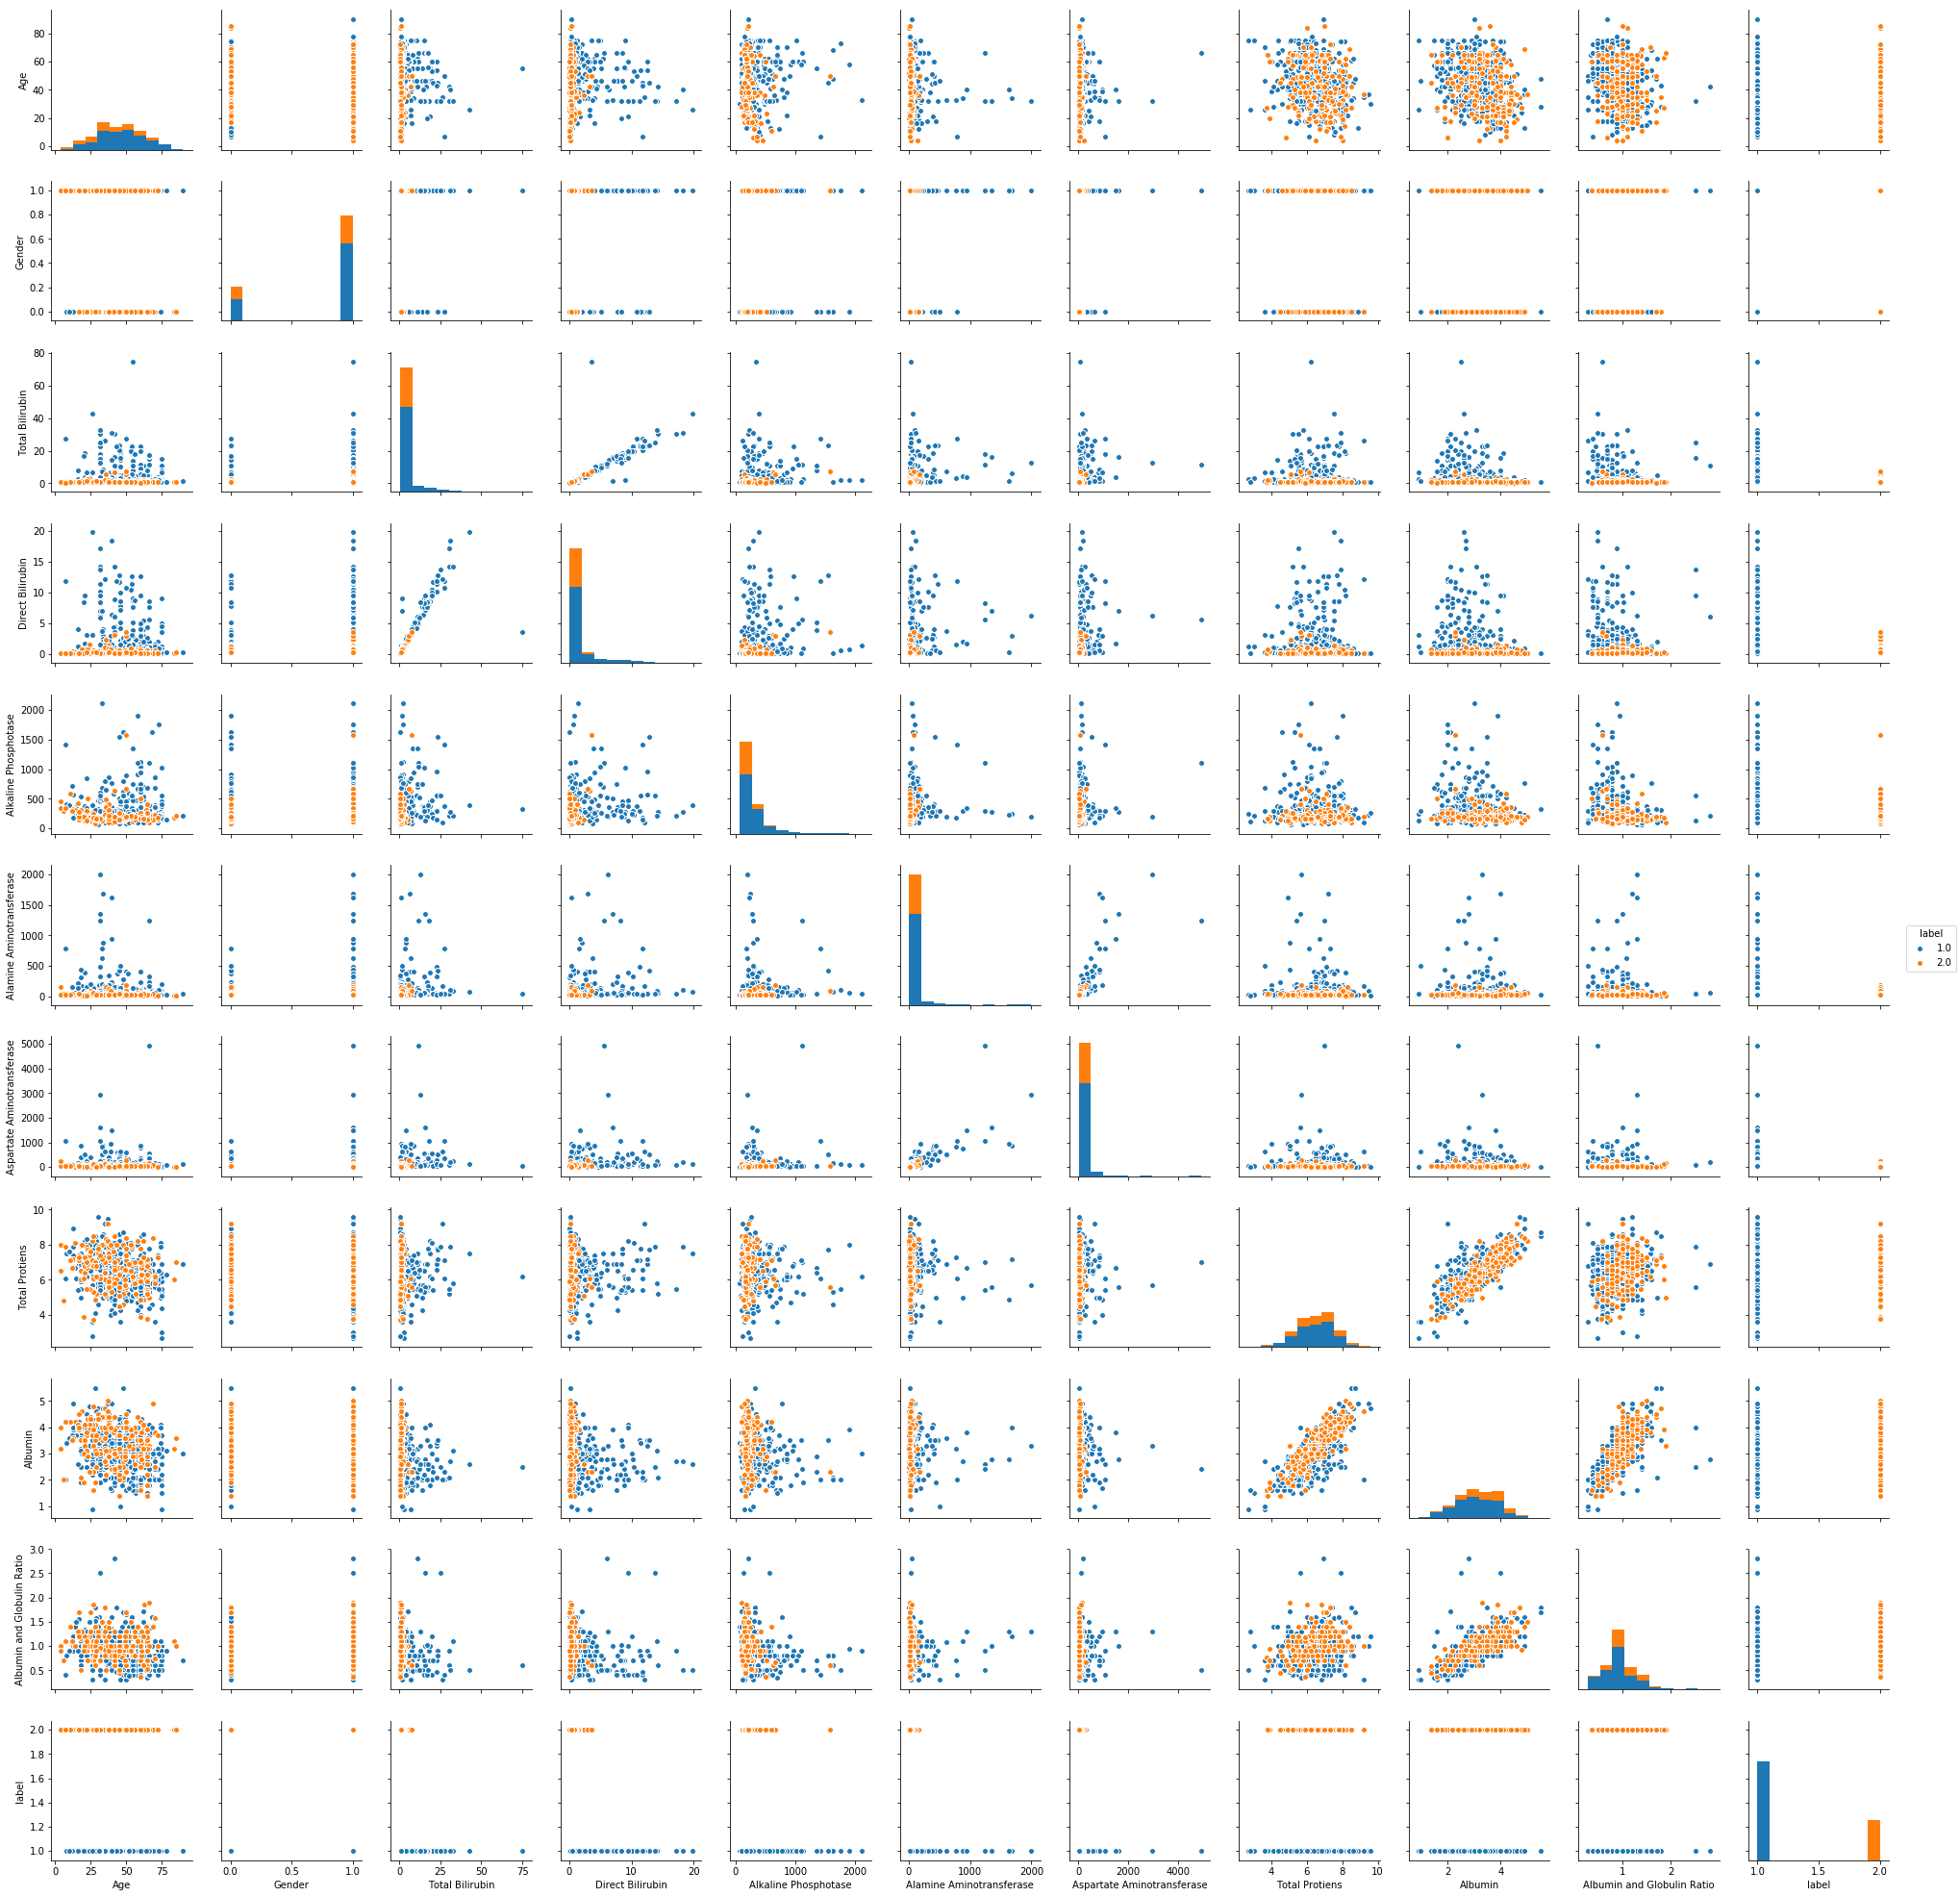

In [448]:
#Checking for pairplots....Yes the number of attributes are very high 8c2/2!=28 pairplots we need to analyse high are key factors
#responsibe for maximum estimated prediction....
sns.pairplot(df,hue="label")
plt.show()

## Applying oversampling technique by giving the class weights..

### Now i need to remove the columns of published_performance as well as estimated_performance because i classified my product as + or -ve based on the two metrics....

Source:http://blog.smola.org/post/4110255196/real-simple-covariate-shift-correction
Source:https://www.analyticsvidhya.com/blog/2017/07/covariate-shift-the-hidden-problem-of-real-world-data-science/

In [449]:
df2=df.copy()
df3=df.copy()

### A small Test to check how Logistic_Regression works when datadistribution of training and testing differs:

In [450]:
def model_test(change_x_train,change_y_train):
    from sklearn.linear_model import LogisticRegression
    clf=LogisticRegression()
    clf.fit(change_x_train,change_y_train)
    #output=clf.predict(change_x_test)
    return clf.score(change_x_train,change_y_train)

In [451]:
def change_to_int(Y_test):
    return[int(i) for i in Y_test]

In [452]:
def real_model_test(change_x_train,change_x_test,change_y_train,change_y_test):
    from sklearn.linear_model import LogisticRegression
    clf=LogisticRegression()
    clf.fit(change_x_train,change_y_train)
    output=clf.predict(change_x_test)
    return clf.score(change_x_test,change_y_test)

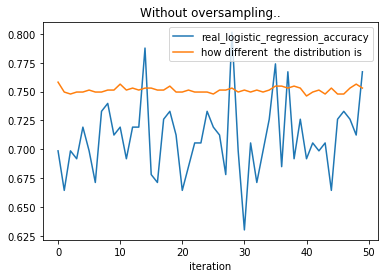

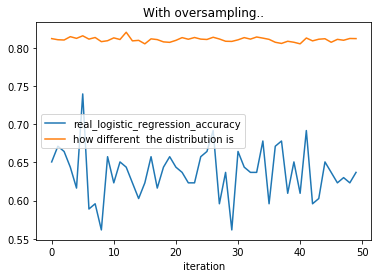

In [453]:
data_dist=[]
real_accuracy=[]
for i in range(50):
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test=train_test_split(df2[df.columns[:len(df.columns)-1]],df2[df.columns[len(df.columns)-1]])
    combined_x_train=pd.DataFrame(np.c_[X_train,change_to_int(Y_train)])
    combined_x_test=pd.DataFrame(np.c_[X_test,change_to_int(Y_test)])
    combined_x_train['new_labels']=np.ones(len(combined_x_train),dtype='int')
    combined_x_test['new_labels']=np.zeros(len(combined_x_test),dtype='int')
    dataframes=[combined_x_train,combined_x_test]
    result=pd.concat(dataframes)
    #print(result.columns)
    change_x_train,change_y_train=result[result.columns[:11]],result[result.columns[11]]
    #change_x_train,change_x_test,change_y_train,change_y_test=train_test_split(result[result.columns[:11]],result[[result.columns[11]]])
    score=model_test(change_x_train,change_y_train)
    real_acc=real_model_test(X_train,X_test,Y_train,Y_test)
    data_dist.append(score)
    real_accuracy.append(real_acc)
import matplotlib.pyplot as plt
plt.title("Without oversampling..")
plt.plot(real_accuracy,label="real_logistic_regression_accuracy")
plt.plot(data_dist,label="how different  the distribution is")
plt.legend()
plt.xlabel("iteration")
plt.show()
new_data_dist=[]
new_real_accuracy=[]
for i in range(50):
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test=train_test_split(df2[df.columns[:len(df.columns)-1]],df2[df.columns[len(df.columns)-1]])
    from imblearn.over_sampling import RandomOverSampler 
    ros = RandomOverSampler(random_state=0)
    X_train, Y_train = ros.fit_sample(X_train, Y_train)
    combined_x_train=pd.DataFrame(np.c_[X_train,change_to_int(Y_train)])
    combined_x_test=pd.DataFrame(np.c_[X_test,change_to_int(Y_test)])
    combined_x_train['new_labels']=np.ones(len(combined_x_train),dtype='int')
    combined_x_test['new_labels']=np.zeros(len(combined_x_test),dtype='int')
    dataframes=[combined_x_train,combined_x_test]
    result=pd.concat(dataframes)
    #print(result.columns)
    change_x_train,change_y_train=result[result.columns[:11]],result[result.columns[11]]
    #change_x_train,change_x_test,change_y_train,change_y_test=train_test_split(result[result.columns[:11]],result[[result.columns[11]]])
    score=model_test(change_x_train,change_y_train)
    real_acc=real_model_test(X_train,X_test,Y_train,Y_test)
    new_data_dist.append(score)
    new_real_accuracy.append(real_acc)
import matplotlib.pyplot as plt
plt.title("With oversampling..")
plt.plot(new_real_accuracy,label="real_logistic_regression_accuracy")
plt.plot(new_data_dist,label="how different  the distribution is")
plt.legend()
plt.xlabel("iteration")
plt.show()  

# Applied Recursive best feature selection to judge the best_features in the dataset as a prior step to build a classifier:

In [454]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x_change,y_change=df2[df.columns[:10]],df2[df.columns[10]]
for i in range(1,len(df2.columns)):
    X_new=SelectKBest(chi2,k=i).fit_transform(x_change,y_change)
    from sklearn.model_selection import train_test_split
    x_trainer,x_tester,y_trainer,y_tester=train_test_split(X_new,y_change,random_state=0)
    from sklearn.linear_model import LogisticRegression
    alg5=LogisticRegression()
    alg5.fit(x_trainer,y_trainer)
    print(" {} best features  and Training-score : {} and Testing_score:{} ".format(i,alg5.score(x_trainer,y_trainer),alg5.score(x_tester,y_tester)))

 1 best features  and Training-score : 0.7231121281464531 and Testing_score:0.684931506849315 
 2 best features  and Training-score : 0.7231121281464531 and Testing_score:0.684931506849315 
 3 best features  and Training-score : 0.7231121281464531 and Testing_score:0.684931506849315 
 4 best features  and Training-score : 0.7231121281464531 and Testing_score:0.684931506849315 
 5 best features  and Training-score : 0.7231121281464531 and Testing_score:0.684931506849315 
 6 best features  and Training-score : 0.7391304347826086 and Testing_score:0.6986301369863014 
 7 best features  and Training-score : 0.7276887871853547 and Testing_score:0.6986301369863014 
 8 best features  and Training-score : 0.7322654462242563 and Testing_score:0.6986301369863014 
 9 best features  and Training-score : 0.7345537757437071 and Testing_score:0.6986301369863014 
 10 best features  and Training-score : 0.7482837528604119 and Testing_score:0.6917808219178082 


In [455]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df2[df.columns[:10]],df2[df.columns[10]],random_state=0)

In [456]:
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(2)
X_poly=X_poly.fit_transform(df2[df.columns[:10]])  
X_poly_train,X_poly_test,Y_poly_train,Y_poly_test=train_test_split(X_poly,df2[df.columns[10]],random_state=1)

In [457]:
X_poly_train.shape

(437, 66)

### PCA....

In [458]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(X_train)
pca_data.shape
Y_train.shape
pca_data=np.vstack((pca_data.T,Y_train))
pca_data=pca_data.T
pca_data_frame=pd.DataFrame(data=pca_data,columns=("1st eigen_vector","2nd eigen_vector","labels"))
pca_data_frame.head()

,1st eigen_vector,2nd eigen_vector,labels
0,-53.570815,120.914015,1.0
1,-150.048738,-101.577899,2.0
2,-130.891265,-85.679127,2.0
3,-86.991001,-126.711686,1.0
4,27.644170,-101.159651,1.0


# Linear_Regression

## We applied linearRegression to classification problems to see how classifier works on classification problem

In [459]:
from sklearn.linear_model import LinearRegression
alg1=LinearRegression()
alg1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [460]:
output=alg1.predict(X_test)

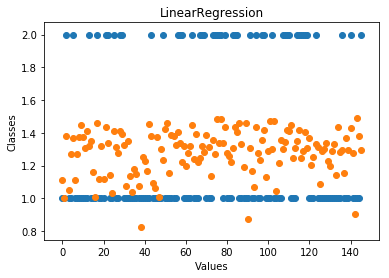

In [461]:
import matplotlib.pyplot as  plt
plt.xlabel('Values')
plt.ylabel('Classes')
plt.title('LinearRegression')
plt.scatter(range(len(Y_test)),Y_test)
plt.scatter(range(len(output)),output)
plt.show()

## Logistic_Regression...

In [462]:
from sklearn.linear_model import LogisticRegression
alg5=LogisticRegression()
alg5.fit(X_train,Y_train)
print("Traing_score:",alg5.score(X_train,Y_train))
print("Testing_score:",alg5.score(X_test,Y_test))
output=alg5.predict(X_test)

Traing_score: 0.7482837528604119
Testing_score: 0.6917808219178082


In [463]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(Y_test,output))
print("Training_score:",alg5.score(X_train,Y_train))
print("Testing_score:",alg5.score(X_test,Y_test))
print(classification_report(output,Y_test))

[[94  6]
 [39  7]]
Training_score: 0.7482837528604119
Testing_score: 0.6917808219178082
             precision    recall  f1-score   support

        1.0       0.94      0.71      0.81       133
        2.0       0.15      0.54      0.24        13

avg / total       0.87      0.69      0.76       146



## Variation in class weights also results in good precision for minority class and reduces false positives  for imbalanced datasets..
### c=1/lambda as lambda increases algorithms falls in underfit and as lambda becomes very less we fall in overfit

In [464]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
search_range=[{'C':[10**-15,10**-14,10**-13,10**-12,10**-11,10**-10,10**-9,10**-8,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9,10**10,10**11,10**12]}]
model_fitter=GridSearchCV(LogisticRegression(),search_range,scoring='accuracy',cv=10)
model_fitter.fit(X_train,Y_train)
print(model_fitter.best_estimator_)
print(model_fitter.score(X_test,Y_test))
print(confusion_matrix(model_fitter.predict(X_test),Y_test))
print(classification_report(model_fitter.predict(X_test),Y_test))

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.7123287671232876
[[98 40]
 [ 2  6]]
             precision    recall  f1-score   support

        1.0       0.98      0.71      0.82       138
        2.0       0.13      0.75      0.22         8

avg / total       0.93      0.71      0.79       146



In [465]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
alg7=LogisticRegression()
scaled_df2=preprocessing.scale(df2[df.columns[:10]])
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_df2,df2[df.columns[10]],random_state=0)
alg7.fit(scaled_x_train,scaled_y_train)
output=alg7.predict(scaled_x_test)
print(confusion_matrix(Y_test,output))
print("Accuracy for Training_score:",alg7.score(scaled_x_train,scaled_y_train))
print("Accuracy for Testing_score:",alg7.score(scaled_x_test,scaled_y_test))
print(classification_report(output,Y_test))

[[93  7]
 [37  9]]
Accuracy for Training_score: 0.7368421052631579
Accuracy for Testing_score: 0.6986301369863014
             precision    recall  f1-score   support

        1.0       0.93      0.72      0.81       130
        2.0       0.20      0.56      0.29        16

avg / total       0.85      0.70      0.75       146



### By applying Random-oversampling  Technique we are able to reduce false positives which is our crucial goal

In [466]:
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler 
rand = RandomOverSampler(random_state=0)
X_rand, Y_rand = rand.fit_sample(X_train, Y_train)
#alg8=LogisticRegression()
alg8=GridSearchCV(LogisticRegression(),search_range,scoring='accuracy',cv=10)
alg8.fit(X_rand,Y_rand)
print(alg8.best_estimator_)
output=alg8.predict(X_test)
print(confusion_matrix(Y_test,output))
print("Accuracy for Traing_score:",alg8.score(X_rand,Y_rand))
print("Accuracy for Testing_score:",alg8.score(X_test,Y_test))
output=alg5.predict(X_test)
print(classification_report(output,Y_test))

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[60 40]
 [ 9 37]]
Accuracy for Traing_score: 0.7151898734177216
Accuracy for Testing_score: 0.6643835616438356
             precision    recall  f1-score   support

        1.0       0.94      0.71      0.81       133
        2.0       0.15      0.54      0.24        13

avg / total       0.87      0.69      0.76       146



### By applying SMOTE.. techniques of oversampling to see how the algorithm behaviour changes.

In [467]:
from imblearn.over_sampling import SMOTE, ADASYN
X_smote, Y_smote = SMOTE(random_state=0).fit_sample(X_train, Y_train)
alg9=GridSearchCV(LogisticRegression(),search_range,scoring='accuracy',cv=10)
alg9.fit(X_smote,Y_smote)
print(alg9.best_estimator_)
output=alg9.predict(X_test)
print(confusion_matrix(Y_test,output))
print("Accuracy Traing_score:",alg9.score(X_smote,Y_smote))
print("Accuracy Testing_score:",alg9.score(X_test,Y_test))
print(classification_report(output,Y_test))

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[60 40]
 [ 9 37]]
Accuracy Traing_score: 0.7151898734177216
Accuracy Testing_score: 0.6643835616438356
             precision    recall  f1-score   support

        1.0       0.60      0.87      0.71        69
        2.0       0.80      0.48      0.60        77

avg / total       0.71      0.66      0.65       146



### By appling ADAYN .. Technique of oversampling we are able to reduce false positives significantly ...

In [468]:
X_adasyn, Y_adasyn = ADASYN(random_state=0).fit_sample(X_train,Y_train)
alg10=GridSearchCV(LogisticRegression(),search_range,scoring='accuracy',cv=10)
#alg10=LogisticRegression()
alg10.fit(X_adasyn,Y_adasyn)
print(alg10.best_estimator_)
output=alg10.predict(X_test)
print(confusion_matrix(Y_test,output))
print("Accuracy for Training_score:",alg10.score(X_smote,Y_smote))
print("Accuracy for Testing_score:",alg10.score(X_test,Y_test))
print(classification_report(output,Y_test))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[48 52]
 [ 7 39]]
Accuracy for Training_score: 0.6930379746835443
Accuracy for Testing_score: 0.5958904109589042
             precision    recall  f1-score   support

        1.0       0.48      0.87      0.62        55
        2.0       0.85      0.43      0.57        91

avg / total       0.71      0.60      0.59       146



## Variations of polynomial Logistic Regression of degree2:
### 1.Weighted  logistic regression model

In [469]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
search_range=[{'C':[10**-10,10**-9,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5]}]
model_fitter1=GridSearchCV(LogisticRegression(class_weight={1:167,2:416}),search_range,scoring='accuracy',cv=10)
model_fitter1.fit(X_poly_train,Y_poly_train)
print(model_fitter1.best_estimator_)
print("accuracy of the model from Grid search {} :".format(model_fitter1.score(X_poly_test,Y_poly_test)))
print(confusion_matrix(model_fitter1.predict(X_poly_test),Y_poly_test))
print(classification_report(model_fitter1.predict(X_poly_test),Y_poly_test))

LogisticRegression(C=0.001, class_weight={1: 167, 2: 416}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
accuracy of the model from Grid search 0.6164383561643836 :
[[57 10]
 [46 33]]
             precision    recall  f1-score   support

        1.0       0.55      0.85      0.67        67
        2.0       0.77      0.42      0.54        79

avg / total       0.67      0.62      0.60       146



### Random Oversampling on polynomial feature data

In [470]:
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler 
rand = RandomOverSampler(random_state=0)
X_poly_rand, Y_poly_rand = rand.fit_sample(X_poly_train, Y_poly_train)
print(X_poly_test.shape)
#alg8=LogisticRegression()
alg88=GridSearchCV(LogisticRegression(),search_range,scoring='accuracy',cv=10)
alg88.fit(X_poly_rand,Y_poly_rand)
print(alg88.best_estimator_)
output=alg88.predict(X_poly_test)
print(confusion_matrix(Y_test,output))
print("Accuracy for Traing_score:",alg88.score(X_poly_rand,Y_poly_rand))
print("Accuracy for Testing_score:",alg88.score(X_poly_test,Y_poly_test))
output=alg88.predict(X_poly_test)
print(classification_report(output,Y_poly_test))

(146, 66)
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[47 53]
 [19 27]]
Accuracy for Traing_score: 0.7507987220447284
Accuracy for Testing_score: 0.6232876712328768
             precision    recall  f1-score   support

        1.0       0.55      0.86      0.67        66
        2.0       0.79      0.42      0.55        80

avg / total       0.68      0.62      0.61       146



### Smote on polynomial Feature data

In [471]:
from imblearn.over_sampling import SMOTE, ADASYN
X_poly_smote, Y_poly_smote = SMOTE(random_state=0).fit_sample(X_poly_train, Y_poly_train)
alg99=GridSearchCV(LogisticRegression(),search_range,scoring='accuracy',cv=10)
alg99.fit(X_poly_smote,Y_poly_smote)
print(alg99.best_estimator_)
output=alg99.predict(X_poly_test)
print(confusion_matrix(Y_poly_test,output))
print("Accuracy Traing_score:",alg99.score(X_poly_smote,Y_poly_smote))
print("Accuracy Testing_score:",alg99.score(X_poly_test,Y_poly_test))
print(classification_report(output,Y_poly_test))

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[59 44]
 [13 30]]
Accuracy Traing_score: 0.7476038338658147
Accuracy Testing_score: 0.6095890410958904
             precision    recall  f1-score   support

        1.0       0.57      0.82      0.67        72
        2.0       0.70      0.41      0.51        74

avg / total       0.64      0.61      0.59       146



### ADASYN on polynomial Feature data

In [472]:
X_poly_adasyn, Y_poly_adasyn = ADASYN(random_state=0).fit_sample(X_poly_train,Y_poly_train)
alg10=GridSearchCV(LogisticRegression(),search_range,scoring='accuracy',cv=10)
#alg10=LogisticRegression()
alg10.fit(X_poly_adasyn,Y_poly_adasyn)
print(alg10.best_estimator_)
output=alg10.predict(X_poly_test)
print(confusion_matrix(Y_test,output))
print("Accuracy for Training_score:",alg10.score(X_poly_smote,Y_poly_smote))
print("Accuracy for Testing_score:",alg10.score(X_poly_test,Y_poly_test))
print(classification_report(output,Y_poly_test))

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
[[47 53]
 [16 30]]
Accuracy for Training_score: 0.7204472843450479
Accuracy for Testing_score: 0.5753424657534246
             precision    recall  f1-score   support

        1.0       0.50      0.83      0.63        63
        2.0       0.74      0.39      0.51        83

avg / total       0.64      0.58      0.56       146



[0.64400162 0.93848155 0.9985166  0.99976331 0.99998077 0.99998987]


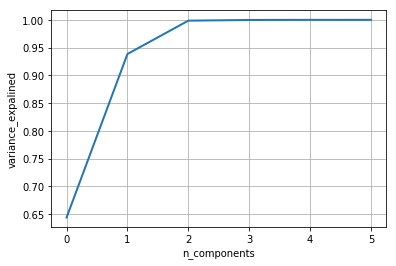

,1st eigen_vector,2nd eigen_vector,labels
0,-26.417856,129.356982,1.0
1,-131.998971,-88.920771,2.0
2,-112.224485,-73.714502,2.0
3,-69.973829,-116.863698,1.0
4,45.383581,-94.608436,1.0


In [473]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(X_adasyn)
pca_data.shape
pca_data=np.vstack((pca_data.T,Y_adasyn))
pca_data=pca_data.T
pca_data_frame=pd.DataFrame(data=pca_data,columns=("1st eigen_vector","2nd eigen_vector","labels"))
pca.n_components=6
pca_data=pca.fit_transform(X_train)
amount_variance_explained=pca.explained_variance_ratio_
cumulative_sum_of_values=np.cumsum(amount_variance_explained)
print(cumulative_sum_of_values)
plt.figure(1,figsize=(6,4))
plt.plot(cumulative_sum_of_values,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('variance_expalined')
plt.show()
pca_data_frame.head()

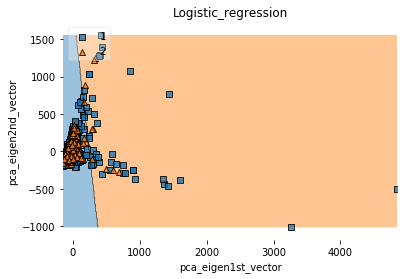

In [474]:
import matplotlib.pyplot as plt
import itertools
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0,class_weight={1:169,2:417})
x_plot,y_plot=np.array(pca_data_frame[["1st eigen_vector","2nd eigen_vector"]]),np.array(pca_data_frame["labels"],dtype='int')
clf=LR.fit(x_plot,y_plot)
plot_decision_regions(x_plot, y_plot, clf=LR, legend=2)
plt.xlabel('pca_eigen1st_vector')
plt.ylabel('pca_eigen2nd_vector')
plt.title('Logistic_regression')
plt.show()

## Decision_Tree:

In [475]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [476]:
clf = DecisionTreeClassifier()
clf.fit(scaled_x_train,scaled_y_train)
output=clf.predict(scaled_x_test)
print("Training_Score:",clf.score(scaled_x_train,scaled_y_train))
print("Testing_Score:",clf.score(scaled_x_test,scaled_y_test))

Training_Score: 1.0
Testing_Score: 0.6232876712328768


In [477]:
from sklearn.metrics import confusion_matrix
confusion_matrix(scaled_y_test,output)

array([[77, 23],
       [32, 14]], dtype=int64)

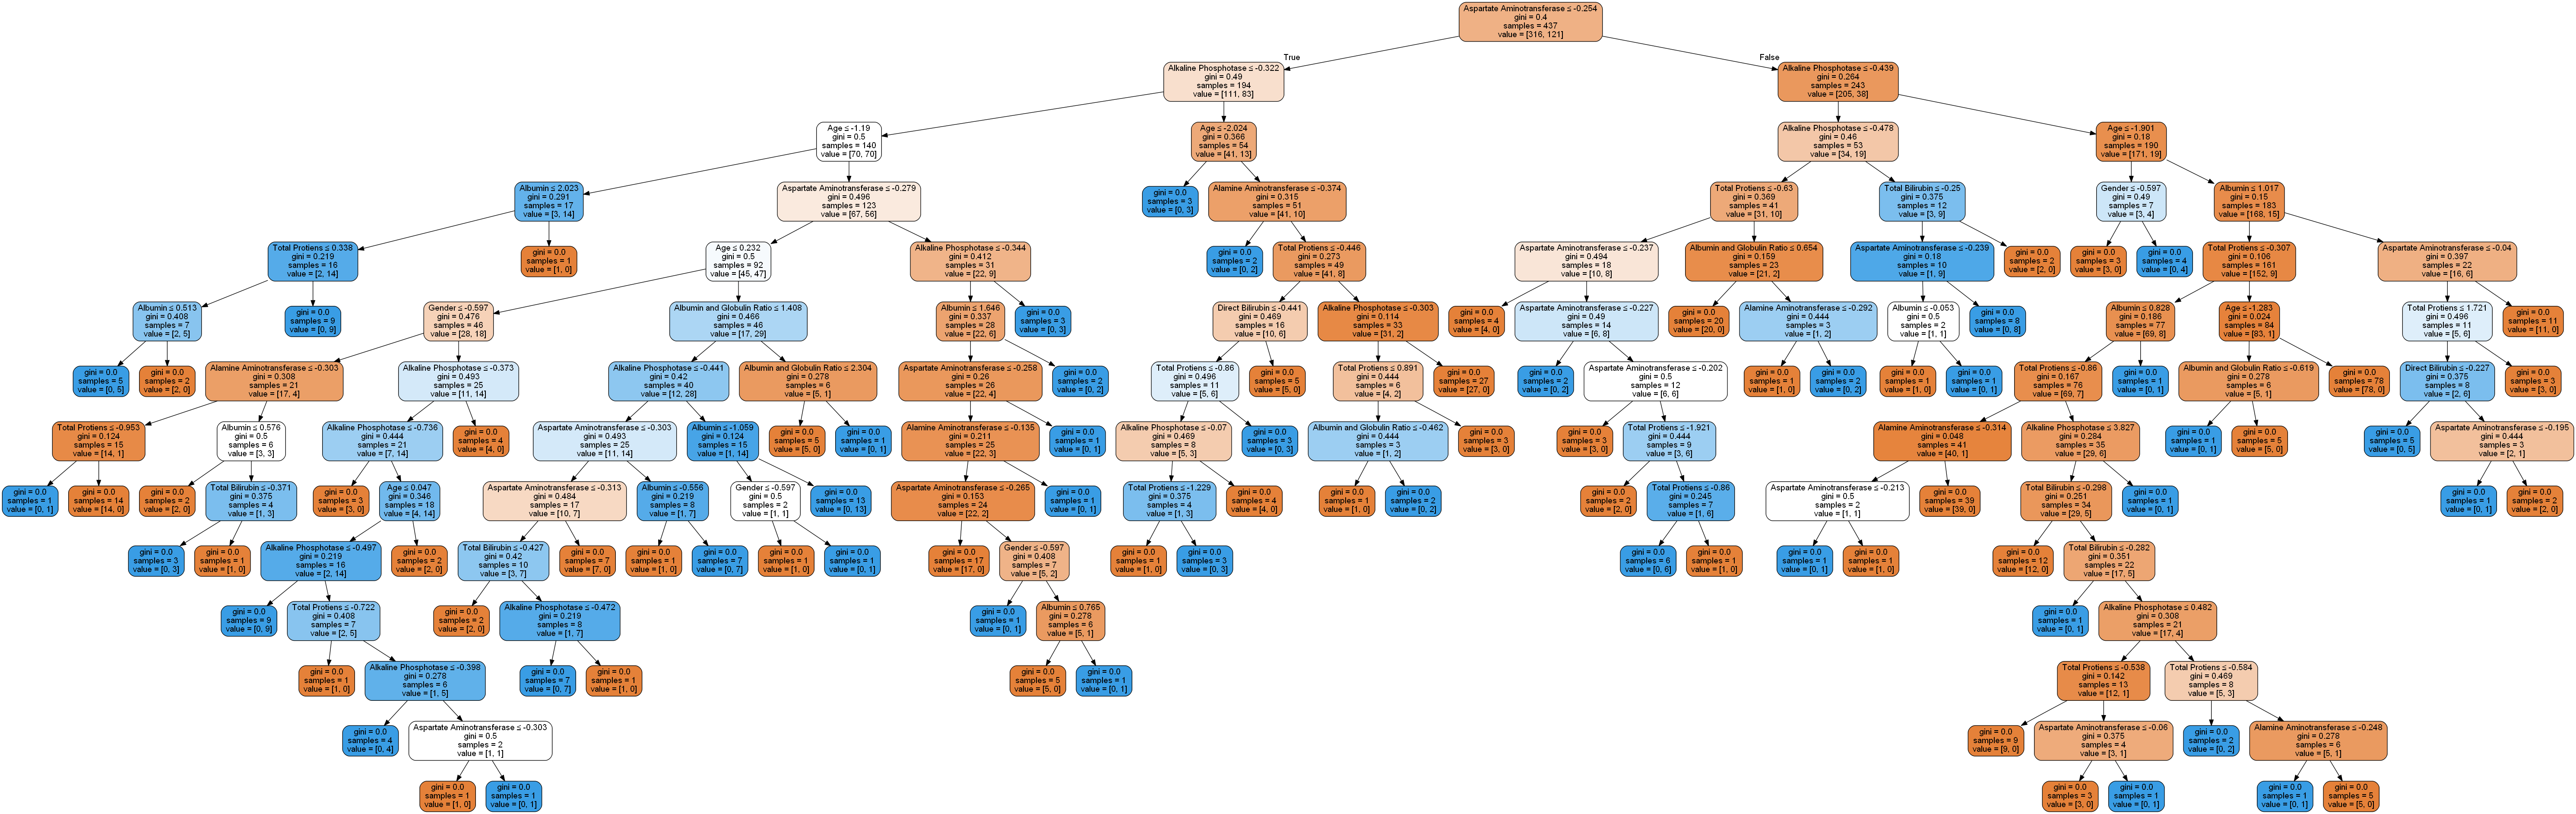

In [478]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names=column_names[:10])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [479]:
clf = DecisionTreeClassifier(class_weight={1:167,2:417})
clf.fit(X_train,Y_train)
output=clf.predict(X_test)
output=clf.predict(X_test)
print("Training_Score:",clf.score(X_train,Y_train))
print("Testing_Score:",clf.score(X_test,Y_test))
confusion_matrix(Y_test,output)

Training_Score: 1.0
Testing_Score: 0.7123287671232876


array([[82, 18],
       [24, 22]], dtype=int64)

In [480]:
print(clf.feature_importances_)
print(classification_report(clf.predict(X_test),Y_test))

[0.16957977 0.01728797 0.0143211  0.11762004 0.20932055 0.20010899
 0.13895382 0.04283319 0.05255206 0.03742249]
             precision    recall  f1-score   support

        1.0       0.82      0.77      0.80       106
        2.0       0.48      0.55      0.51        40

avg / total       0.73      0.71      0.72       146



### Problem with decision Trees have a huge disadvantage for outliers and it overfits in Training. So there is a need to control the depth of tree which is a hyper parameter

In [481]:
depth_range=[{'max_depth':[1,2,3,4,5,6,7,8,9]}]
decision_tree=GridSearchCV(DecisionTreeClassifier(class_weight={1:167,2:417}),depth_range,scoring='accuracy',cv=10)
decision_tree.fit(X_train,Y_train)
print(decision_tree.best_estimator_)
print("Training_accuracy:{}".format(decision_tree.score(X_train,Y_train)))
print("Testing_accuracy:{}".format(decision_tree.score(X_test,Y_test)))
print(confusion_matrix(decision_tree.predict(X_test),Y_test))
print(classification_report(decision_tree.predict(X_test),Y_test))

DecisionTreeClassifier(class_weight={1: 167, 2: 417}, criterion='gini',
            max_depth=9, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Training_accuracy:0.88558352402746
Testing_accuracy:0.6643835616438356
[[74 23]
 [26 23]]
             precision    recall  f1-score   support

        1.0       0.74      0.76      0.75        97
        2.0       0.50      0.47      0.48        49

avg / total       0.66      0.66      0.66       146



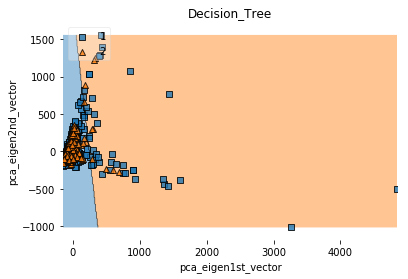

In [482]:
import matplotlib.pyplot as plt
import itertools
import matplotlib.gridspec as gridspec
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier(random_state=0,class_weight={1:169,2:417},max_depth=4)
x_plot,y_plot=np.array(pca_data_frame[["1st eigen_vector","2nd eigen_vector"]]),np.array(pca_data_frame["labels"],dtype='int')
clf=DT.fit(x_plot,y_plot)
plot_decision_regions(x_plot, y_plot, clf=LR, legend=2)
plt.xlabel('pca_eigen1st_vector')
plt.ylabel('pca_eigen2nd_vector')
plt.title('Decision_Tree')
plt.show()

## KNearestNeighbors_Classifier..

In [483]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold
from collections import Counter

In [484]:
df2.shape

(583, 11)

### Wanted to apply Cross validation and variations of cross-validation to find the best K:

In [485]:
x=np.array(df2.iloc[:,0:10])
y=np.array(df2.iloc[:,10])

## Simple-Crossvalidation.....

In [486]:
# X_train stands training set and X_test for testing set.......
#Y_train for training labels and Y_test for testing labels............
x_train,x_test,y_train,y_test=cross_validation.train_test_split(x,y,random_state=0)
#Further more splitting of training data for getting validation set to predict the right K.......
X11_train,X11_validation,Y11_train,Y11_validation=cross_validation.train_test_split(X_train,Y_train,test_size=0.3,random_state=0)
X11_validation.shape

(132, 10)

In [487]:
def cross_validation_score_for_several_K_values(X_train,X_validation,Y_train,Y_validation):
    #I choose to go for only odd values of K from 1 to 40....
    for i in range(1,30,2):
        knn=KNeighborsClassifier(i)
        knn.fit(X_train,Y_train)
        predicted_cross_validation_values=knn.predict(X_validation)
        acc=accuracy_score(Y_validation,predicted_cross_validation_values,normalize=True)*100.000
        print("Cross-validation Accuracy for my k={} is {}".format(i,acc))

In [488]:
cross_validation_score_for_several_K_values(X11_train,X11_validation,Y11_train,Y11_validation)

Cross-validation Accuracy for my k=1 is 63.63636363636363
Cross-validation Accuracy for my k=3 is 66.66666666666666
Cross-validation Accuracy for my k=5 is 62.121212121212125
Cross-validation Accuracy for my k=7 is 59.84848484848485
Cross-validation Accuracy for my k=9 is 61.36363636363637
Cross-validation Accuracy for my k=11 is 65.15151515151516
Cross-validation Accuracy for my k=13 is 63.63636363636363
Cross-validation Accuracy for my k=15 is 65.15151515151516
Cross-validation Accuracy for my k=17 is 68.93939393939394
Cross-validation Accuracy for my k=19 is 67.42424242424242
Cross-validation Accuracy for my k=21 is 67.42424242424242
Cross-validation Accuracy for my k=23 is 68.18181818181817
Cross-validation Accuracy for my k=25 is 65.9090909090909
Cross-validation Accuracy for my k=27 is 66.66666666666666
Cross-validation Accuracy for my k=29 is 68.18181818181817


In [489]:
#I choose k=1 to be my best K values from my cross_validation Accuracy.....
knn=KNeighborsClassifier(17)
knn.fit(X11_train,Y11_train)
output=knn.predict(X_test)
acc=accuracy_score(Y_test,output,normalize=True)*float(100)
print("The Test Accuracy for K=17 is {}".format(acc))

The Test Accuracy for K=17 is 64.38356164383562


In [490]:
def label_to_int(labels):
    #Basically predicted values are in str mode needed to convert into integer...
    labels=[int(i) for i in labels]
    return labels

In [491]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors
def knn_comparison(x_train,y_train,n_neighbors):
    c_map_light = ListedColormap(['#FFAAAA', '#BCCCC0'])
    c_map_bold = ListedColormap(['#FF0000', '#00FF00'])
    neigh=KNeighborsClassifier(n_neighbors)
    x_train_2d=x_train[:,[0,3]]
    neigh.fit(x_train_2d,y_train)
    xx_min,xx_max,yy_min,yy_max=x_train_2d[:,0].min(),x_train_2d[:,0].max(),x_train_2d[:,1].min(),x_train_2d[:,1].max()
    small_xx,small_yy=np.meshgrid(np.arange(xx_min-2,xx_max+2,0.5),np.arange(yy_min-2,yy_max+2,0.5))
    x_test=np.c_[small_xx.ravel(),small_yy.ravel()]
    output=neigh.predict(x_test)
    output=label_to_int(output)
    output=np.array(output)
    output=output.reshape(small_xx.shape)
    plt.figure()
    plt.title("for k={}".format(n_neighbors))
    plt.pcolormesh(small_xx,small_yy,output,cmap=c_map_light) 
    plt.scatter(x_train_2d[:,0],x_train_2d[:,1],c=y_train,cmap=c_map_bold)

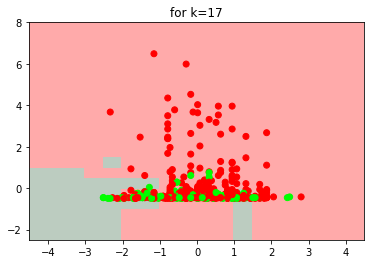

In [492]:
knn_comparison(scaled_x_train,scaled_y_train,17)

In [493]:
confusion_matrix(output,Y_test)

array([[88, 40],
       [12,  6]], dtype=int64)

### Applying Random-oversampling Techniques..

Cross-validation Accuracy for my k=1 is 89.24050632911393
Cross-validation Accuracy for my k=3 is 74.0506329113924
Cross-validation Accuracy for my k=5 is 72.15189873417721
Cross-validation Accuracy for my k=7 is 78.48101265822784
Cross-validation Accuracy for my k=9 is 75.31645569620254
Cross-validation Accuracy for my k=11 is 74.0506329113924
Cross-validation Accuracy for my k=13 is 75.31645569620254
Cross-validation Accuracy for my k=15 is 74.0506329113924
Cross-validation Accuracy for my k=17 is 77.84810126582279
Cross-validation Accuracy for my k=19 is 75.31645569620254
Cross-validation Accuracy for my k=21 is 78.48101265822784
Cross-validation Accuracy for my k=23 is 74.68354430379746
Cross-validation Accuracy for my k=25 is 74.68354430379746
Cross-validation Accuracy for my k=27 is 74.68354430379746
Cross-validation Accuracy for my k=29 is 75.31645569620254
The Test Accuracy for K=1 is 60.95890410958904
[[70 27]
 [30 19]]
             precision    recall  f1-score   support

   

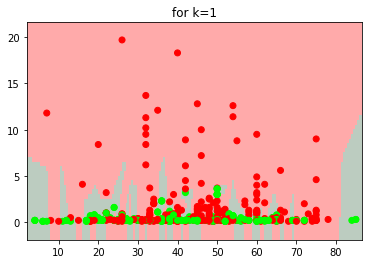

In [494]:
x_train_rand,x_cv_rand,y_train_rand,y_cv_rand=cross_validation.train_test_split(X_rand,Y_rand,random_state=0)
cross_validation_score_for_several_K_values(x_train_rand,x_cv_rand,y_train_rand,y_cv_rand)
knn_comparison(x_train_rand,y_train_rand,1)
knn=KNeighborsClassifier(1)
knn.fit(x_train_rand,y_train_rand)
output=knn.predict(X_test)
acc=accuracy_score(Y_test,output,normalize=True)*float(100)
print("The Test Accuracy for K=1 is {}".format(acc))
print(confusion_matrix(output,Y_test))
print(classification_report(output,Y_test))

### Applying smote technique....

Cross-validation Accuracy for my k=1 is 84.17721518987342
Cross-validation Accuracy for my k=3 is 77.21518987341773
Cross-validation Accuracy for my k=5 is 75.9493670886076
Cross-validation Accuracy for my k=7 is 75.31645569620254
Cross-validation Accuracy for my k=9 is 74.68354430379746
Cross-validation Accuracy for my k=11 is 75.9493670886076
Cross-validation Accuracy for my k=13 is 73.41772151898735
Cross-validation Accuracy for my k=15 is 74.68354430379746
Cross-validation Accuracy for my k=17 is 75.31645569620254
Cross-validation Accuracy for my k=19 is 75.31645569620254
Cross-validation Accuracy for my k=21 is 74.0506329113924
Cross-validation Accuracy for my k=23 is 74.0506329113924
Cross-validation Accuracy for my k=25 is 74.0506329113924
Cross-validation Accuracy for my k=27 is 73.41772151898735
Cross-validation Accuracy for my k=29 is 71.51898734177216
The Test Accuracy for K=3 is 58.9041095890411
[[60 20]
 [40 26]]
             precision    recall  f1-score   support

      

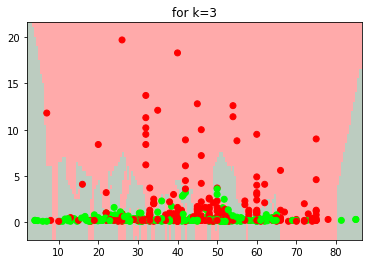

In [495]:
x_train_smote,x_cv_smote,y_train_smote,y_cv_smote=cross_validation.train_test_split(X_smote,Y_smote,random_state=0)
cross_validation_score_for_several_K_values(x_train_smote,x_cv_smote,y_train_smote,y_cv_smote)
knn_comparison(x_train_smote,y_train_smote,3)
knn=KNeighborsClassifier(3)
knn.fit(x_train_smote,y_train_smote)
output=knn.predict(X_test)
acc=accuracy_score(Y_test,output,normalize=True)*float(100)
print("The Test Accuracy for K=3 is {}".format(acc))
print(confusion_matrix(output,Y_test))
print(classification_report(output,Y_test))

### Applying ADASYN. Technique...

Cross-validation Accuracy for my k=1 is 57.92682926829268
Cross-validation Accuracy for my k=3 is 59.756097560975604
Cross-validation Accuracy for my k=5 is 60.36585365853659
Cross-validation Accuracy for my k=7 is 57.92682926829268
Cross-validation Accuracy for my k=9 is 60.97560975609756
Cross-validation Accuracy for my k=11 is 60.97560975609756
Cross-validation Accuracy for my k=13 is 60.36585365853659
Cross-validation Accuracy for my k=15 is 58.536585365853654
Cross-validation Accuracy for my k=17 is 59.14634146341463
Cross-validation Accuracy for my k=19 is 62.19512195121951
Cross-validation Accuracy for my k=21 is 62.19512195121951
Cross-validation Accuracy for my k=23 is 62.19512195121951
Cross-validation Accuracy for my k=25 is 60.97560975609756
Cross-validation Accuracy for my k=27 is 60.97560975609756
Cross-validation Accuracy for my k=29 is 60.97560975609756
The Test Accuracy for K=11 is 53.42465753424658
[[42 10]
 [58 36]]
             precision    recall  f1-score   suppor

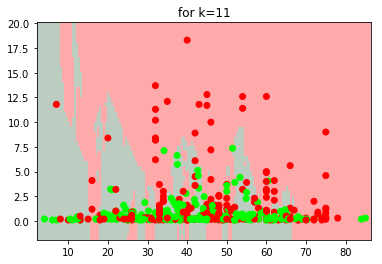

In [496]:
x_train_adasyn,x_cv_adasyn,y_train_adasyn,y_cv_adasyn=cross_validation.train_test_split(X_adasyn,Y_adasyn,random_state=0)
cross_validation_score_for_several_K_values(x_train_adasyn,x_cv_adasyn,y_train_adasyn,y_cv_adasyn)
knn_comparison(x_train_adasyn,y_train_adasyn,11)
knn=KNeighborsClassifier(11)
knn.fit(x_train_adasyn,y_train_adasyn)
output=knn.predict(X_test)
acc=accuracy_score(Y_test,output,normalize=True)*float(100)
print("The Test Accuracy for K=11 is {}".format(acc))
print(confusion_matrix(output,Y_test))
print(classification_report(output,Y_test))

## Random_Forests.(Bagging)

In [497]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0,class_weight={1:167,2:416})
print(clf.fit(X_train,Y_train))
output=clf.predict(X_test)
print("Training_Score:",clf.score(X_train,Y_train))
print("Testing_Score:",clf.score(X_test,Y_test))
print(confusion_matrix(Y_test,output))

RandomForestClassifier(bootstrap=True, class_weight={1: 167, 2: 416},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
Training_Score: 0.977116704805492
Testing_Score: 0.6438356164383562
[[88 12]
 [40  6]]


In [498]:
from sklearn.ensemble import RandomForestClassifier
trees_in_forest=[{'n_estimators':np.arange(1,20,1)}]
random_forest=GridSearchCV(RandomForestClassifier(random_state=0,n_jobs=-1,class_weight={1:167,2:416}),trees_in_forest,scoring='accuracy',cv=10)
random_forest.fit(X_train, y_train)
print(random_forest.best_estimator_)
print("Training_accuracy: {}".format(random_forest.score(X_train,y_train)))
print("Testing_accuracy: {}".format(random_forest.score(X_test,y_test)))
print(confusion_matrix(y_test,random_forest.predict(X_test)))

RandomForestClassifier(bootstrap=True, class_weight={1: 167, 2: 416},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=14, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
Training_accuracy: 0.9908466819221968
Testing_accuracy: 0.6438356164383562
[[86 14]
 [38  8]]


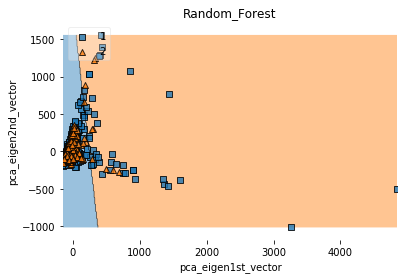

In [499]:
import matplotlib.pyplot as plt
import itertools
import matplotlib.gridspec as gridspec
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(random_state=0,class_weight={1:169,2:417},max_depth=4)
x_plot,y_plot=np.array(pca_data_frame[["1st eigen_vector","2nd eigen_vector"]]),np.array(pca_data_frame["labels"],dtype='int')
clf=RF.fit(x_plot,y_plot)
plot_decision_regions(x_plot, y_plot, clf=LR, legend=2)
plt.xlabel('pca_eigen1st_vector')
plt.ylabel('pca_eigen2nd_vector')
plt.title('Random_Forest')
plt.show()

## Extra-Trees..

In [500]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree=ExtraTreesClassifier(bootstrap=True,max_depth=None, random_state=0,class_weight={1:167,2:416})
extra_tree.fit(X_train,y_train)
print("Training_accuracy:{}".format(extra_tree.score(X_train,y_train)))
print("Testing_accuracy:{}".format(extra_tree.score(X_test,y_test)))
print(confusion_matrix(y_test,extra_tree.predict(X_test)))
print(classification_report(Y_test,extra_tree.predict(X_test)))

Training_accuracy:0.9839816933638444
Testing_accuracy:0.7054794520547946
[[94  6]
 [37  9]]
             precision    recall  f1-score   support

        1.0       0.72      0.94      0.81       100
        2.0       0.60      0.20      0.30        46

avg / total       0.68      0.71      0.65       146



In [501]:
extra_trees=[{'n_estimators':np.arange(5,30,5)}]
extra_tree=GridSearchCV(ExtraTreesClassifier(bootstrap=True,random_state=0,n_jobs=-1,class_weight={1:167,2:416}),extra_trees,scoring='accuracy',cv=10)
extra_tree.fit(X_train, y_train)
print(extra_tree.best_estimator_)
print("Training_accuracy: {}".format(extra_tree.score(X_train,y_train)))

ExtraTreesClassifier(bootstrap=True, class_weight={1: 167, 2: 416},
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)
Training_accuracy: 0.9839816933638444


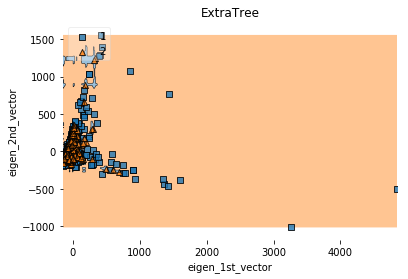

In [502]:
import matplotlib.pyplot as plt
import itertools
import matplotlib.gridspec as gridspec
from sklearn.ensemble import ExtraTreesClassifier
ET= ExtraTreesClassifier(random_state=0,n_estimators=14)
x_plot,y_plot=np.array(pca_data_frame[["1st eigen_vector","2nd eigen_vector"]]),np.array(pca_data_frame["labels"],dtype='int')
clf=ET.fit(x_plot,y_plot)
plot_decision_regions(x_plot, y_plot, clf=clf, legend=2)
plt.xlabel('eigen_1st_vector')
plt.ylabel('eigen_2nd_vector')
plt.title('ExtraTree')
plt.show()

## Boosting by using GBDT-trees

In [503]:
from sklearn.ensemble import GradientBoostingClassifier
depth=np.arange(1,5,1)
learning_rate=[1,0.1,0.01,0.001,0.0001,0.00001]
trees_in_boosting=np.arange(100,500,100)
row_samples=[0.4,0.5,0.6,0.7,0.8]
controller=[{'max_depth':depth},{'learning_rate':learning_rate},{'n_estimators':trees_in_boosting},{'subsample':row_samples}]
boosting_tree=GridSearchCV(GradientBoostingClassifier(random_state=0),controller,scoring='accuracy',cv=10)
boosting_tree.fit(X_train, y_train)
print(boosting_tree.best_estimator_)
print("Training_accuracy:{}".format(boosting_tree.score(X_train,y_train)))
print("Testing_accuracy:{}".format(boosting_tree.score(X_test,y_test)))
print(confusion_matrix(y_test,boosting_tree.predict(X_test)))
print(classification_report(Y_test,boosting_tree.predict(X_test)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)
Training_accuracy:0.7894736842105263
Testing_accuracy:0.7191780821917808
[[97  3]
 [38  8]]
             precision    recall  f1-score   support

        1.0       0.72      0.97      0.83       100
        2.0       0.73      0.17      0.28        46

avg / total       0.72      0.72      0.65       146



### Key observation here in sklearn gradient boosting do not have the option of class weight thats why this algorithm is not so succesful in giving best results especially for minority class..
### secondly the base learners without class weights do not perform well when we donot apply class weight as we seen it above..
### Idea is used to use oversampling data...

In [504]:
depth=np.arange(1,10,1)
learning_rate=[1,0.1,0.01,0.001,0.0001,0.00001]
trees_in_boosting=np.arange(100,2000,100)
row_samples=[0.4,0.5,0.6,0.7,0.8]
controller=[{'max_depth':depth},{'learning_rate':learning_rate},{'n_estimators':trees_in_boosting},{'subsample':row_samples}]
sampled_boosting_tree=GridSearchCV(GradientBoostingClassifier(random_state=0),controller,scoring='accuracy',cv=10)
sampled_boosting_tree.fit(X_adasyn, Y_adasyn)
print(sampled_boosting_tree.best_estimator_)
print("Training_accuracy:{}".format(sampled_boosting_tree.score(X_adasyn,Y_adasyn)))
print("Testing_accuracy:{}".format(sampled_boosting_tree.score(X_test,y_test)))
print(confusion_matrix(y_test,sampled_boosting_tree.predict(X_test)))
print(classification_report(Y_test,sampled_boosting_tree.predict(X_test)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)
Training_accuracy:1.0
Testing_accuracy:0.6712328767123288
[[74 26]
 [22 24]]
             precision    recall  f1-score   support

        1.0       0.77      0.74      0.76       100
        2.0       0.48      0.52      0.50        46

avg / total       0.68      0.67      0.67       146



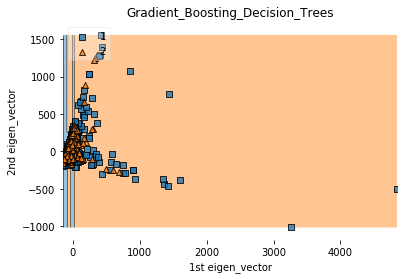

In [505]:
import matplotlib.pyplot as plt
import itertools
import matplotlib.gridspec as gridspec
from sklearn.ensemble import GradientBoostingClassifier
GBDT= GradientBoostingClassifier(random_state=0,n_estimators=14)
x_plot,y_plot=np.array(pca_data_frame[["1st eigen_vector","2nd eigen_vector"]]),np.array(pca_data_frame["labels"],dtype='int')
clf=GBDT.fit(x_plot,y_plot)
plot_decision_regions(x_plot, y_plot, clf=clf, legend=2)
plt.xlabel('1st eigen_vector')
plt.ylabel('2nd eigen_vector')
plt.title('Gradient_Boosting_Decision_Trees')
plt.show()

## XGBOOST...

## https://anaconda.org/conda-forge/xgboost

In [506]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

https://anaconda.org/conda-forge/mlxtend

## Gaussian NaiveBayes..

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)
output=clf.predict(X_test)
print("Training_score: {}".format(clf.score(X_train,Y_train)))
print("Testing_score:{}".format(clf.score(X_test,Y_test)))
print(confusion_matrix(output,Y_test))
print(classification_report(output,Y_test))

### Gaussian Naive Bayes being extensively used in Textprocessing i see the conditional independence is the biggest limitation of why naive bayes not working so well on our data.  Many Research papers show that eventhough you have some features which are conditionally independent and the each feature or majority of the features follows the gaussian Distribution then Gaussian NaiveBayes would work well.

In [ ]:
## Applying Random oversampling to see how algorithm changes...
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_rand, Y_rand)
output=clf.predict(X_test)
print("Training_score: {}".format(clf.score(X_rand,Y_rand)))
print("Testing_score:{}".format(clf.score(X_test,Y_test)))
print(confusion_matrix(output,Y_test))

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_smote, Y_smote)
output=clf.predict(X_test)
print("Training_score: {}".format(clf.score(X_smote,Y_smote)))
print("Testing_score:{}".format(clf.score(X_test,Y_test)))
print(confusion_matrix(Y_test,output))

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_adasyn, Y_adasyn)
output=clf.predict(X_test)
print("Training_score: {}".format(clf.score(X_adasyn,Y_adasyn)))
print("Testing_score:{}".format(clf.score(X_test,Y_test)))
print(confusion_matrix(output,Y_test))

## Multinomial NaiveBayes..

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, Y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
print("Training_score: {}".format(clf.score(X_train,Y_train)))
print("Testing_score:{}".format(clf.score(X_test,Y_test)))
print(confusion_matrix(output,Y_test))
print(classification_report(output,Y_test))

## Support_Vector_Machines..

In [ ]:
from sklearn import svm
clf = svm.SVC(random_state=0)
print(clf.fit(X_train,Y_train))
print("Training_score for svm:{}".format(clf.score(X_train,Y_train)))
print("Testing_score for svm:{}".format(clf.score(X_test,Y_test)))
print("Total no of support-vectors:{}".format(clf.support_vectors_.shape[0]))
output=clf.predict(X_test)
print(confusion_matrix(output,Y_test))

### We can clearly see that model fall in overfit in training and in testing  it is just saying that majortiy class is the output.This also shows that accuracy is misleading metric in classification

In [ ]:
### Applying SVC ON THE TRAINED OVERSAMPLED DATA.....
from sklearn import svm
svm_clf = svm.SVC(random_state=0)
print(svm_clf.fit(X_rand,Y_rand))
print("Training_score for svm:{}".format(svm_clf.score(X_rand,Y_rand)))
print("Testing_score for svm:{}".format(svm_clf.score(X_test,Y_test)))
print("Total no of support-vectors:{}".format(svm_clf.support_vectors_.shape[0]))
output=svm_clf.predict(X_test)
print(confusion_matrix(output,Y_test))

In [ ]:
from sklearn import svm
rand_svm_clf = svm.SVC(random_state=0)
print(rand_svm_clf.fit(X_smote,Y_smote))
print("Training_score for svm:{}".format(rand_svm_clf.score(X_smote,Y_smote)))
print("Testing_score for svm:{}".format(rand_svm_clf.score(X_test,Y_test)))
print("Total no of support-vectors:{}".format(rand_svm_clf.support_vectors_.shape[0]))
output=rand_svm_clf.predict(X_test)
print(confusion_matrix(output,Y_test))

In [ ]:
from sklearn import svm
clf = svm.SVC(random_state=0)
print(clf.fit(X_adasyn,Y_adasyn))
print("Training_score for svm:{}".format(clf.score(X_adasyn,Y_adasyn)))
print("Testing_score for svm:{}".format(clf.score(X_test,Y_test)))
print("Total no of support-vectors:{}".format(clf.support_vectors_.shape[0]))
output=clf.predict(X_test)
print(confusion_matrix(output,Y_test))

In [ ]:
### Lets try with class-weight...
clf=svm.SVC(random_state=0)
print(clf.fit(X_adasyn,Y_adasyn))
print("Training_score for svm:{}".format(clf.score(X_adasyn,Y_adasyn)))
print("Testing_score for svm:{}".format(clf.score(X_test,Y_test)))
print("Total no of support-vectors:{}".format(clf.support_vectors_.shape[0]))
output=clf.predict(X_test)
print(confusion_matrix(output,Y_test))

### All the three oversampling techniques we applied here are not performing as expected so we need to find the right hyperparameter using Grid search

In [ ]:
#alg10=GridSearchCV(svm.SVC(class_weight={1:167,2:416}),search_range,scoring='accuracy',cv=10)
#alg8=LogisticRegression()
search_range=[{'C':[10**-8,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6,10**7,10**8]}]
alg88=GridSearchCV(svm.SVC(random_state=0,class_weight={1:167,2:416}),search_range,scoring='accuracy',cv=10)
alg88.fit(X_train,Y_train)
print(alg88.best_estimator_)
output=alg88.predict(X_test)
print(confusion_matrix(Y_test,output))
print("Accuracy for Traing_score:",alg88.score(X_train,Y_train))
print("Accuracy for Testing_score:",alg88.score(X_test,Y_test))
output=alg88.predict(X_test)
print(classification_report(output,Y_test))

In [ ]:
linearsvm_clf = svm.LinearSVC(random_state=0)
print(linearsvm_clf.fit(X_train, Y_train))
print("Training_score for linearsvm:{}".format(clf.score(X_train,Y_train)))
print("Testing_score for linearsvm :{} ".format(clf.score(X_test,Y_test)))
print(confusion_matrix(linearsvm_clf.predict(X_test),Y_test))

### Applying the right weight for classes and choosing the right C value which is the hyperparameter to minimize the Hinge_loss in svm as a part of Bias-Variance Trade off shows a great increase in precision for minority class

In [ ]:
search_range=[{'C':[10**-8,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6,10**7,10**8]}]
alg88=GridSearchCV(svm.LinearSVC(random_state=0,class_weight={1:167,2:416}),search_range,scoring='accuracy',cv=10)
alg88.fit(X_train,Y_train)
print(alg88.best_estimator_)
output=alg88.predict(X_test)
print(confusion_matrix(Y_test,output))
print("Accuracy for Traing_score:",alg88.score(X_train,Y_train))
print("Accuracy for Testing_score:",alg88.score(X_test,Y_test))
output=alg88.predict(X_test)
print(classification_report(output,Y_test))

In [ ]:
search_range=[{'C':[10**-8,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6,10**7,10**8]}]
alg88=GridSearchCV(svm.LinearSVC(random_state=0),search_range,scoring='accuracy',cv=10)
alg88.fit(X_rand,Y_rand)
print(alg88.best_estimator_)
output=alg88.predict(X_test)
print(confusion_matrix(Y_test,output))
print("Accuracy for Traing_score:",alg88.score(X_rand,Y_rand))
print("Accuracy for Testing_score:",alg88.score(X_test,Y_test))
output=alg88.predict(X_test)
print(classification_report(output,Y_test))

In [ ]:
import matplotlib.pyplot as plt
import itertools
import matplotlib.gridspec as gridspec
from sklearn import svm
GBDT= svm.LinearSVC(C=0.001,random_state=0)
x_plot,y_plot=np.array(pca_data_frame[["1st eigen_vector","2nd eigen_vector"]]),np.array(pca_data_frame["labels"],dtype='int')
clf=GBDT.fit(x_plot,y_plot)
plot_decision_regions(x_plot, y_plot, clf=clf, legend=2)
plt.xlabel('1st eigen_vector')
plt.ylabel('2nd eigen_vector')
plt.title('Support_Vector_Machines')
plt.show()

In [ ]:
search_range=[{'C':[10**-8,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6,10**7,10**8]}]
alg88=GridSearchCV(svm.LinearSVC(random_state=0,class_weight={1:167,2:416}),search_range,scoring='accuracy',cv=10)
alg88.fit(X_adasyn,Y_adasyn)
print(alg88.best_estimator_)
output=alg88.predict(X_test)
print(confusion_matrix(Y_test,output))
print("Accuracy for Traing_score:",alg88.score(X_adasyn,Y_adasyn))
print("Accuracy for Testing_score:",alg88.score(X_test,Y_test))
output=alg88.predict(X_test)
print(classification_report(output,Y_test))

### NU-SVM means nu stands for error we can define the amount of error svm can make during training phase and nu<1

In [ ]:
search_range=[{'nu':[10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1]}]
alg88=GridSearchCV(svm.NuSVC(random_state=0,class_weight={1:167,2:416}),search_range,scoring='accuracy',cv=10)
alg88.fit(X_train,Y_train)
print(alg88.best_estimator_)
output=alg88.predict(X_test)
print(confusion_matrix(Y_test,output))
print("Accuracy for Traing_score:",alg88.score(X_train,Y_train))
print("Accuracy for Testing_score:",alg88.score(X_test,Y_test))
output=alg88.predict(X_test)
print(classification_report(output,Y_test))

### RBF-Kernal SVM With two hyperparameters c and sigma c: for comtrolling hingeloss and sigma for the kernal function k (x1,x2)=1/exp(-dist(x1,x2)/2*sigma^2) in svm our  gamma=1/sigma.

In [ ]:
search_range=[{'C':[10**-8,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6,10**7]},{'gamma':[10**-8,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6,10**7]}]
alg88=GridSearchCV(svm.SVC(random_state=0,class_weight={1:167,2:416}),search_range,scoring='accuracy',cv=10)
alg88.fit(X_train,Y_train)
print(alg88.best_estimator_)
output=alg88.predict(X_test)
print(confusion_matrix(Y_test,output))
print("Accuracy for Traing_score:",alg88.score(X_train,Y_train))
print("Accuracy for Testing_score:",alg88.score(X_test,Y_test))
output=alg88.predict(X_test)
print(classification_report(output,Y_test))

In [ ]:
import matplotlib.pyplot as plt
import itertools
import matplotlib.gridspec as gridspec
from sklearn import svm
GBDT= svm.SVC(C=0.001,kernel='rbf',random_state=0)
x_plot,y_plot=np.array(pca_data_frame[["1st eigen_vector","2nd eigen_vector"]]),np.array(pca_data_frame["labels"],dtype='int')
clf=GBDT.fit(x_plot,y_plot)
plot_decision_regions(x_plot, y_plot, clf=clf, legend=2)
plt.xlabel('1st eigen_vector')
plt.ylabel('2nd eigen_vector')
plt.title('Support_Vector_Machines')
plt.show()

## Visualizing Higher Dimensional_data to 2dimension using PCA..
### mainpurpose
   ### 1.DataVisualization
   ### 2.For choosing the right d-dash for maximal variance capturing...

In [ ]:
pca.n_components=6
pca_data=pca.fit_transform(X_train)
amount_variance_explained=pca.explained_variance_ratio_
cumulative_sum_of_values=np.cumsum(amount_variance_explained)
print(cumulative_sum_of_values)
plt.figure(1,figsize=(6,4))
plt.plot(cumulative_sum_of_values,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('variance_expalined')
plt.show()

## Its very clear that when we move from a higher dimension to lower dimension the amount of dataloss is quite low...

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors
def knn_pca_comparison(x_train,y_train,n_neighbors):
    c_map_light = ListedColormap(['#FFAAAA', '#BCCCC0'])
    c_map_bold = ListedColormap(['#FF0000', '#00FF00'])
    neigh=KNeighborsClassifier(n_neighbors)
    x_train_2d=x_train
    neigh.fit(x_train_2d,y_train)
    xx_min,xx_max,yy_min,yy_max=x_train_2d[:,0].min(),x_train_2d[:,0].max(),x_train_2d[:,1].min(),x_train_2d[:,1].max()
    small_xx,small_yy=np.meshgrid(np.arange(xx_min-2,xx_max+2,0.5),np.arange(yy_min-2,yy_max+2,0.5))
    x_test=np.c_[small_xx.ravel(),small_yy.ravel()]
    output=neigh.predict(x_test)
    output=label_to_int(output)
    output=np.array(output)
    output=output.reshape(small_xx.shape)
    plt.figure()
    plt.title("for k={}".format(n_neighbors))
    plt.pcolormesh(small_xx,small_yy,output,cmap=c_map_light) 
    plt.scatter(x_train_2d[:,0],x_train_2d[:,1],c=y_train,cmap=c_map_bold)

In [ ]:
from sklearn import preprocessing
scaled_pca_dataframe=preprocessing.scale(pca_data_frame[['1st eigen_vector','2nd eigen_vector']])
#print(scaled_pca_dataframe)
for i in range(1,8,2):
    knn_pca_comparison(scaled_pca_dataframe,pca_data_frame["labels"],i)

#print(pca_data_frame["labels"])
#knn_comparison(scaled_x_train,pca_data_frame["labels"],1)

## T-stochasticNeighborhoodEmbedding...

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data=StandardScaler().fit_transform(X_train)
data=pd.DataFrame(data,columns=df.columns[:10])
data_labels=Y_train
tsne_model=TSNE(n_components=2,random_state=0)
tsne_data=tsne_model.fit_transform(data)
tsne_data.shape

In [ ]:
tsne_data=np.vstack((tsne_data.T,data_labels))
tsne_data.shape

In [ ]:
tsne_data=tsne_data.T
tsne_data.shape
tsne_data

In [ ]:
#Now i got my data to the right track...
tsne_data=pd.DataFrame(tsne_data,columns=("1stcomponent","2ndcomponent","labels"))
#print(tsne_data.head())
import seaborn as sns
sns.FacetGrid(tsne_data,hue="labels",size=6).map(plt.scatter,"1stcomponent","2ndcomponent").add_legend()
plt.show()

In [ ]:
## Let me tune some hyper parameters to view whether the data can be seperable or not...
## 1.perplexity 2.no of iterations...

## Let me change the perplexity to 50.. to view the datadistribution..
perpex=[2,7,10,25,40,50,100,300,500,750]
for i in perpex:
    tsne_model=TSNE(n_components=2,random_state=0,perplexity=i,n_iter=3000)
    tsne_data=tsne_model.fit_transform(data)
    tsne_data=np.vstack((tsne_data.T,data_labels)).T
    tsne_perp_50=pd.DataFrame(tsne_data,columns=("1stcomponent","2ndcomponent","labels"))
    sns.FacetGrid(tsne_perp_50,hue="labels",size=6).map(plt.scatter,"1stcomponent","2ndcomponent").add_legend()
    plt.title("for perplexity={}".format(i))
    plt.show()